# Deep Neural Networks 

In [1]:
import numpy as np
import tflearn
from tflearn.datasets import mnist

C:\Users\user\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


### Load MNIST Dataset 

In [2]:
MNIST_data = mnist.read_data_sets(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [3]:
data_train = MNIST_data.train
data_validation = MNIST_data.validation
data_test = MNIST_data.test

In [4]:
X, y = data_train._images, data_train._labels

### Make the model

Here, we make three hidden layers, with fully connected nodes


In [5]:
tflearn.init_graph(num_cores=4)

net = tflearn.input_data(shape=[None, 784])
net = tflearn.fully_connected(net, 100, activation='relu')
net = tflearn.fully_connected(net, 100, activation='relu')
net = tflearn.fully_connected(net, 10, activation='softmax')

net = tflearn.regression(net, loss='categorical_crossentropy', optimizer='adam')

model = tflearn.DNN(net)

### Train the model 

In [6]:
model.fit(X, y, n_epoch=1, batch_size=10, show_metric=True)

Training Step: 5499  | total loss: 0.08567 | time: 19.647s
| Adam | epoch: 001 | loss: 0.08567 - acc: 0.9761 -- iter: 54990/55000
Training Step: 5500  | total loss: 0.07813 | time: 19.647s
| Adam | epoch: 001 | loss: 0.07813 - acc: 0.9785 -- iter: 55000/55000
--


### Visualizing the results 

In [7]:
import matplotlib.pyplot as plt

In [8]:
y_test = data_test._labels

In [9]:
pred_y = model.predict(MNIST_data.test.images)

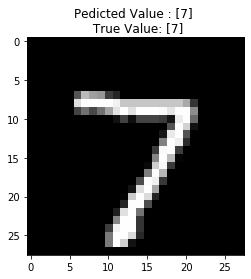

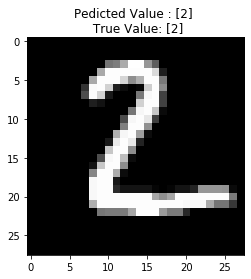

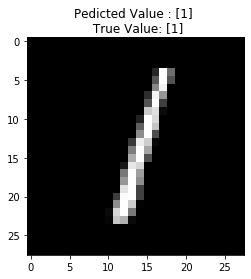

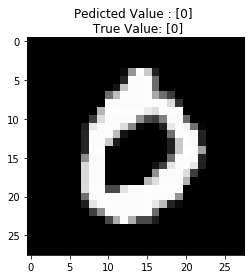

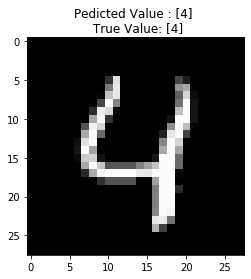

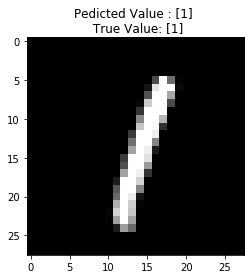

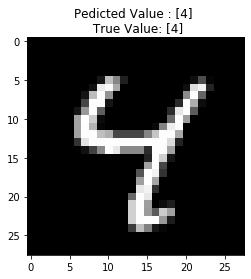

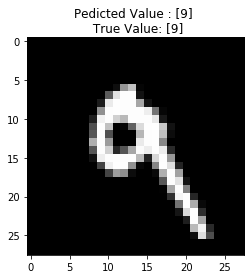

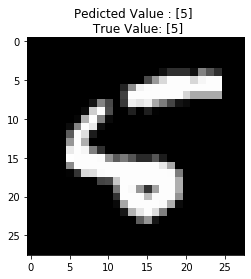

In [16]:
for i in range(9):
    first_image = data_test.images[i] 
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    result_pred = np.where(pred_y[i] == np.amax(pred_y[i]))
    predict_y = result_pred[0]
    
    result_test = np.where(y_test[i] == np.amax(y_test[i]))
    y_test_values = result_test[0]
    plt.title('Pedicted Value : {} \n True Value: {}'.format(predict_y, y_test_values))
    plt.show()
